Ladet die Daten aus Seaborn
Speichert die Daten lokal in einer CSV-Datei

Anschließend beginnt mit eurer Analyse


Welche Analysen könnten für Fluggesellschaften interessant sein?

In [2]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
flights = sns.load_dataset('flights')

In [4]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset('flights')  

df = pd.DataFrame(data)

df.to_csv('flights_data.csv', index=False)  

In [5]:
flights_data = pd.read_csv('flights_data.csv')
flights_data

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [6]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        144 non-null    int64 
 1   month       144 non-null    object
 2   passengers  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [7]:
flights_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [8]:
flights_data.duplicated().sum()

0

#### 1. Passagierzahlen pro Jahr


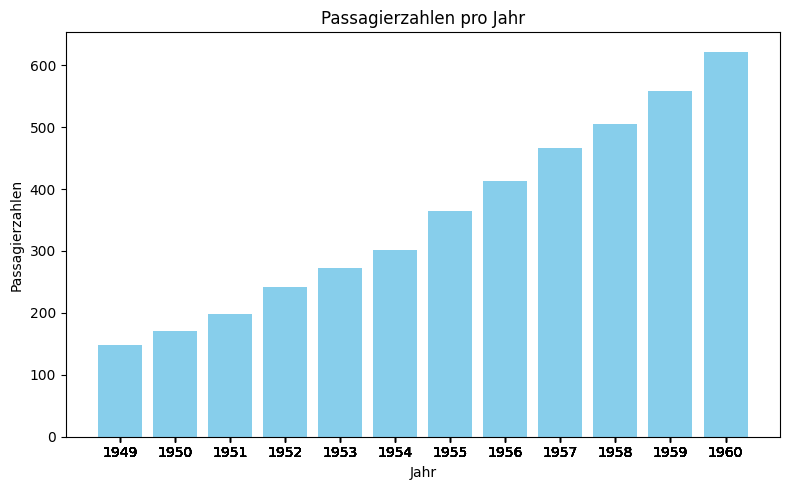

In [9]:
plt.figure(figsize=(8, 5))
plt.bar(flights_data['year'], flights_data['passengers'], color='skyblue')
plt.title('Passagierzahlen pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Passagierzahlen')
plt.xticks(flights_data['year']) 
plt.tight_layout()
plt.show()

#### 2. Durchschnittliche monatliche Passagierzahlen


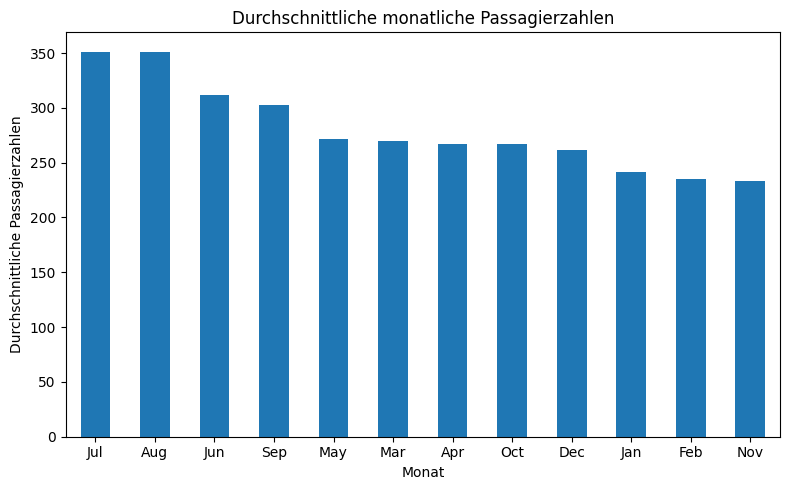

In [10]:
monthly_mean = flights_data.groupby('month')['passengers'].mean()
monthly_mean_sorted = monthly_mean.sort_values(ascending=False)
plt.figure(figsize=(8, 5))
monthly_mean_sorted.plot(kind='bar')
plt.title('Durchschnittliche monatliche Passagierzahlen')
plt.xlabel('Monat')
plt.ylabel('Durchschnittliche Passagierzahlen')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 3. Flugpassagiere über die Zeit(Monat)

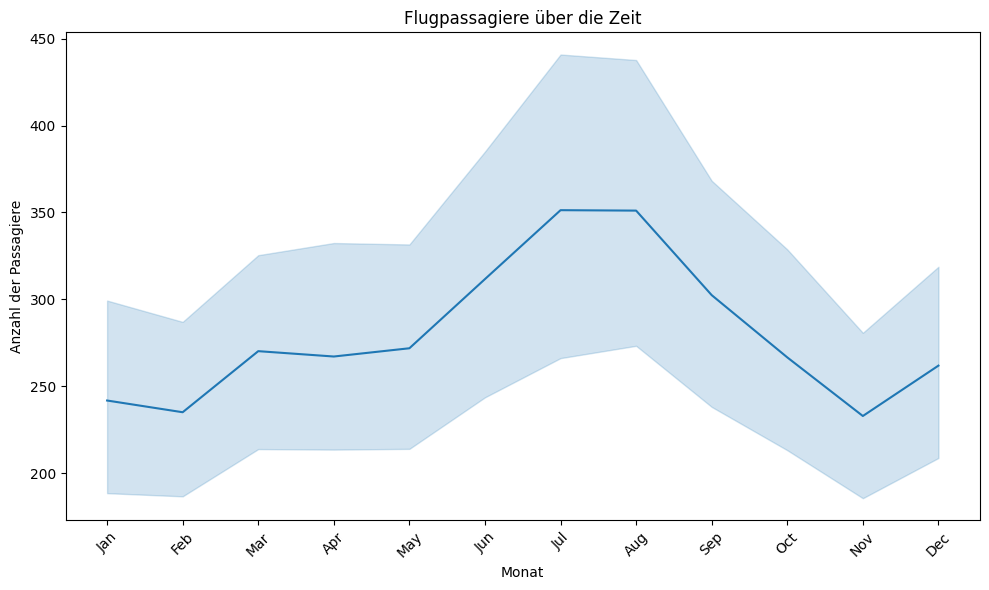

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='passengers', data=flights)
plt.title('Flugpassagiere über die Zeit')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Passagiere')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 4. Passagierzahlen nach Jahreszeiten

In [12]:
import seaborn as sns

flights = sns.load_dataset('flights')

def season_of_month(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Frühling'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Sommer'
    elif month in ['Sep', 'Oct', 'Nov']:
        return 'Herbst'

flights['Season'] = flights['month'].apply(season_of_month)

season_passenger_count = flights.groupby('Season')['passengers'].sum().reset_index()

print(season_passenger_count)


     Season  passengers
0  Frühling        9709
1    Herbst        9622
2    Sommer       12169
3    Winter        8863


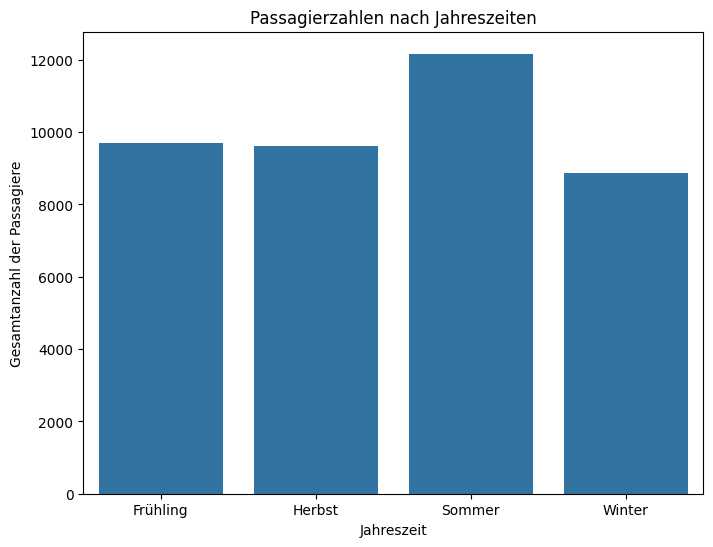

In [13]:
season_passenger_count = flights.groupby('Season')['passengers'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Season', y='passengers', data=season_passenger_count)
plt.title('Passagierzahlen nach Jahreszeiten')
plt.xlabel('Jahreszeit')
plt.ylabel('Gesamtanzahl der Passagiere')
plt.show()

#### 5. Anzahl der Passagiere pro Monat und Jahr

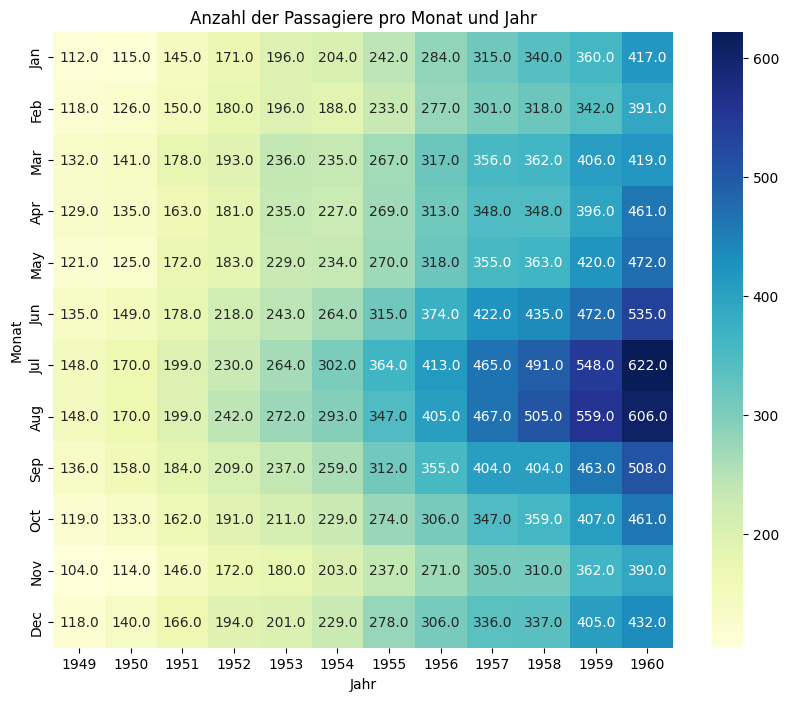

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

flights = sns.load_dataset('flights')

passengers_per_month_per_year = flights.groupby(['year', 'month'])['passengers'].sum().reset_index()

passengers_pivot = passengers_per_month_per_year.pivot_table(index='month', columns='year', values='passengers')

plt.figure(figsize=(10, 8))
sns.heatmap(passengers_pivot, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Anzahl der Passagiere pro Monat und Jahr')
plt.xlabel('Jahr')
plt.ylabel('Monat')
plt.show()


#### 6. Wachstum der Passagierzahlen nach Monat und Jahr

In [15]:
import seaborn as sns
import pandas as pd

flights = sns.load_dataset('flights')

passengers_per_month_per_year = flights.groupby(['year', 'month'])['passengers'].sum().reset_index()

passengers_per_month_per_year = passengers_per_month_per_year.sort_values(['year', 'month'])

passengers_per_month_per_year['growth'] = passengers_per_month_per_year.groupby('month')['passengers'].pct_change()

display(passengers_per_month_per_year)


,year,month,passengers,growth
0,1949,Jan,112,NaN
1,1949,Feb,118,NaN
2,1949,Mar,132,NaN
3,1949,Apr,129,NaN
4,1949,May,121,NaN
...,...,...,...,...
139,1960,Aug,606,0.084079
140,1960,Sep,508,0.097192
141,1960,Oct,461,0.132678
142,1960,Nov,390,0.077348


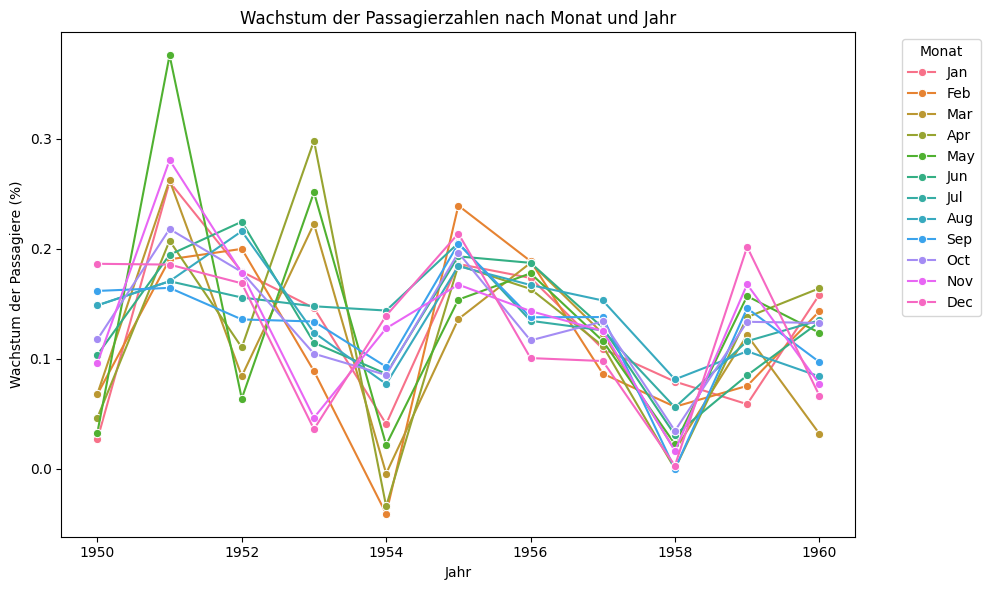

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Laden des Datensatzes
flights = sns.load_dataset('flights')

# Gruppieren und Aggregieren der Daten nach Jahr und Monat, um die Summe der Passagiere zu erhalten
passengers_per_month_per_year = flights.groupby(['year', 'month'])['passengers'].sum().reset_index()

# Sortieren der Daten nach Jahr und Monat
passengers_per_month_per_year = passengers_per_month_per_year.sort_values(['year', 'month'])

# Berechnen des prozentualen Wachstums der Passagierzahlen für jeden Monat und jedes Jahr
passengers_per_month_per_year['growth'] = passengers_per_month_per_year.groupby('month')['passengers'].pct_change()

# Erstellen eines Linienplots für das Wachstum der Passagierzahlen
plt.figure(figsize=(10, 6))
sns.lineplot(data=passengers_per_month_per_year, x='year', y='growth', hue='month', marker='o')
plt.title('Wachstum der Passagierzahlen nach Monat und Jahr')
plt.xlabel('Jahr')
plt.ylabel('Wachstum der Passagiere (%)')
plt.legend(title='Monat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


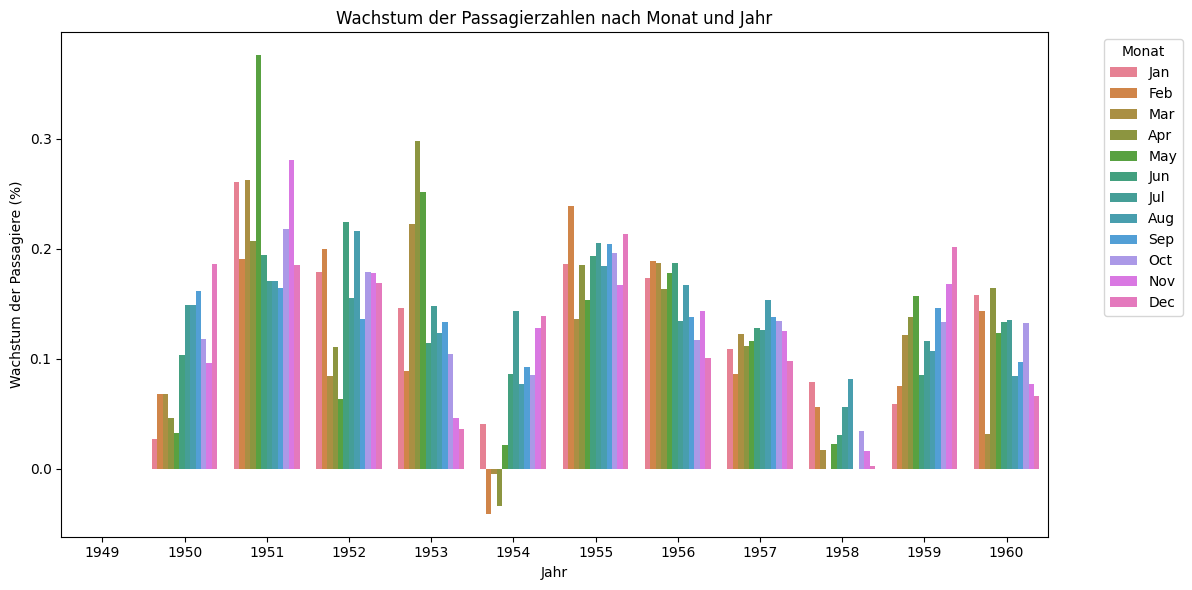

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Laden des Datensatzes
flights = sns.load_dataset('flights')

# Gruppieren und Aggregieren der Daten nach Jahr und Monat, um die Summe der Passagiere zu erhalten
passengers_per_month_per_year = flights.groupby(['year', 'month'])['passengers'].sum().reset_index()

# Sortieren der Daten nach Jahr und Monat
passengers_per_month_per_year = passengers_per_month_per_year.sort_values(['year', 'month'])

# Berechnen des prozentualen Wachstums der Passagierzahlen für jeden Monat und jedes Jahr
passengers_per_month_per_year['growth'] = passengers_per_month_per_year.groupby('month')['passengers'].pct_change()

# Erstellen eines Balkendiagramms für das Wachstum der Passagierzahlen
plt.figure(figsize=(12, 6))
sns.barplot(data=passengers_per_month_per_year, x='year', y='growth', hue='month', ci=None)
plt.title('Wachstum der Passagierzahlen nach Monat und Jahr')
plt.xlabel('Jahr')
plt.ylabel('Wachstum der Passagiere (%)')
plt.legend(title='Monat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


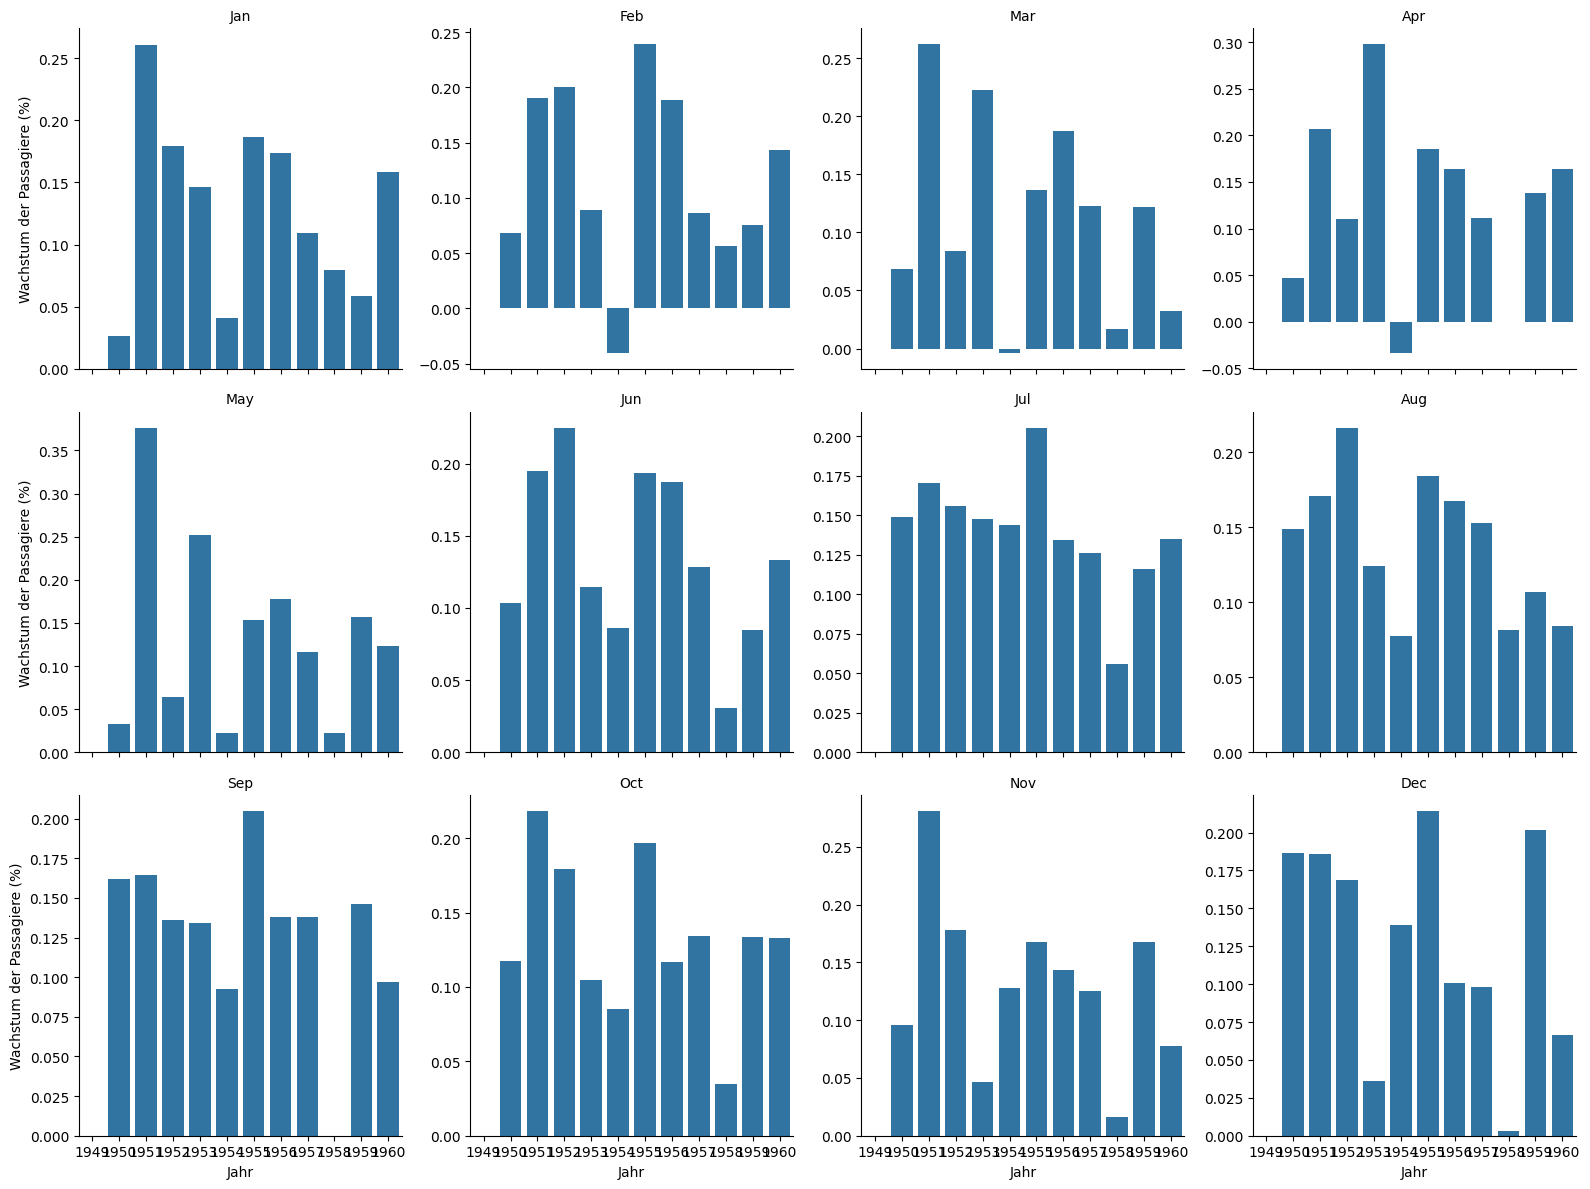

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Laden des Datensatzes
flights = sns.load_dataset('flights')

# Gruppieren und Aggregieren der Daten nach Jahr und Monat, um die Summe der Passagiere zu erhalten
passengers_per_month_per_year = flights.groupby(['year', 'month'])['passengers'].sum().reset_index()

# Sortieren der Daten nach Jahr und Monat
passengers_per_month_per_year = passengers_per_month_per_year.sort_values(['year', 'month'])

# Berechnen des prozentualen Wachstums der Passagierzahlen für jeden Monat und jedes Jahr
passengers_per_month_per_year['growth'] = passengers_per_month_per_year.groupby('month')['passengers'].pct_change()

# Erstellen von Facettenplots für das Wachstum der Passagierzahlen nach Monat und Jahr
g = sns.FacetGrid(passengers_per_month_per_year, col='month', col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='year', y='growth', ci=None)
g.set_titles('{col_name}')
g.set_axis_labels('Jahr', 'Wachstum der Passagiere (%)')
plt.tight_layout()
plt.show()


#### 7. Top 10 Monate mit dem höchsten und niedrigsten Wachstum der Passagierzahlen

In [19]:
import seaborn as sns
import pandas as pd

# Laden des Datensatzes
flights = sns.load_dataset('flights')

# Gruppieren und Aggregieren der Daten nach Jahr und Monat, um die Summe der Passagiere zu erhalten
passengers_per_month_per_year = flights.groupby(['year', 'month'])['passengers'].sum().reset_index()

# Sortieren der Daten nach Jahr und Monat
passengers_per_month_per_year = passengers_per_month_per_year.sort_values(['year', 'month'])

# Berechnen des prozentualen Wachstums der Passagierzahlen für jeden Monat und jedes Jahr
passengers_per_month_per_year['growth'] = passengers_per_month_per_year.groupby('month')['passengers'].pct_change()

# Top 10 Monate mit dem höchsten Wachstum
top_10_highest_growth = passengers_per_month_per_year.nlargest(10, 'growth')

# Top 10 Monate mit dem niedrigsten Wachstum
top_10_lowest_growth = passengers_per_month_per_year.nsmallest(10, 'growth')

print("Top 10 Monate mit dem höchsten Wachstum:")
display(top_10_highest_growth)

print("\nTop 10 Monate mit dem niedrigsten Wachstum:")
display(top_10_lowest_growth)


Top 10 Monate mit dem höchsten Wachstum:


,year,month,passengers,growth
28,1951,May,172,0.376000
51,1953,Apr,235,0.298343
34,1951,Nov,146,0.280702
26,1951,Mar,178,0.262411
24,1951,Jan,145,0.260870
52,1953,May,229,0.251366
73,1955,Feb,233,0.239362
41,1952,Jun,218,0.224719
50,1953,Mar,236,0.222798
33,1951,Oct,162,0.218045



Top 10 Monate mit dem niedrigsten Wachstum:


,year,month,passengers,growth
61,1954,Feb,188,-0.040816
63,1954,Apr,227,-0.034043
62,1954,Mar,235,-0.004237
111,1958,Apr,348,0.000000
116,1958,Sep,404,0.000000
119,1958,Dec,337,0.002976
118,1958,Nov,310,0.016393
110,1958,Mar,362,0.016854
64,1954,May,234,0.021834
112,1958,May,363,0.022535


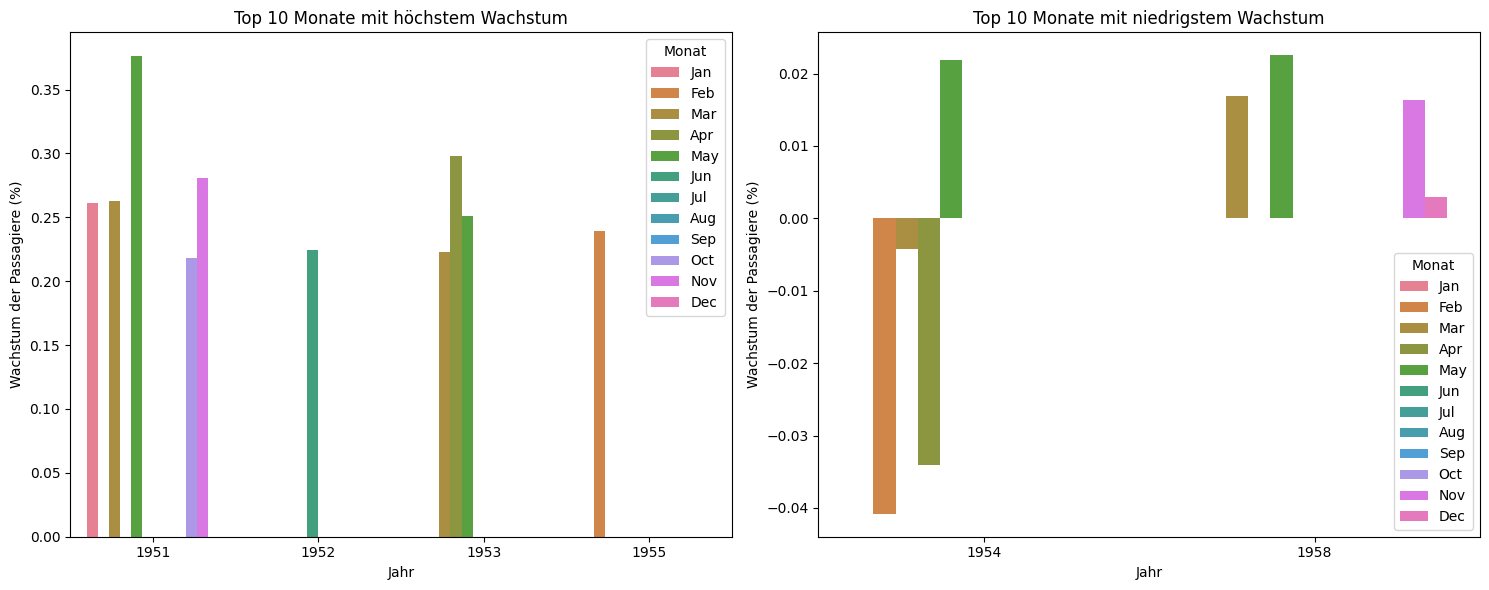

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Laden des Datensatzes
flights = sns.load_dataset('flights')

# Gruppieren und Aggregieren der Daten nach Jahr und Monat, um die Summe der Passagiere zu erhalten
passengers_per_month_per_year = flights.groupby(['year', 'month'])['passengers'].sum().reset_index()

# Sortieren der Daten nach Jahr und Monat
passengers_per_month_per_year = passengers_per_month_per_year.sort_values(['year', 'month'])

# Berechnen des prozentualen Wachstums der Passagierzahlen für jeden Monat und jedes Jahr
passengers_per_month_per_year['growth'] = passengers_per_month_per_year.groupby('month')['passengers'].pct_change() #die prozentuale Veränderung der Passagierzahlen von einem Monat zum nächsten zu berechnen

# Top 10 Monate mit dem höchsten Wachstum
top_10_highest_growth = passengers_per_month_per_year.nlargest(10, 'growth')

# Top 10 Monate mit dem niedrigsten Wachstum
top_10_lowest_growth = passengers_per_month_per_year.nsmallest(10, 'growth')

# Erstellen von Subplots für die Top 10 Monate mit dem höchsten und niedrigsten Wachstum
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot für Top 10 Monate mit höchstem Wachstum
sns.barplot(data=top_10_highest_growth, x='year', y='growth', hue='month', ax=axes[0])
axes[0].set_title('Top 10 Monate mit höchstem Wachstum')
axes[0].set_xlabel('Jahr')
axes[0].set_ylabel('Wachstum der Passagiere (%)')
axes[0].legend(title='Monat')

# Subplot für Top 10 Monate mit niedrigstem Wachstum
sns.barplot(data=top_10_lowest_growth, x='year', y='growth', hue='month', ax=axes[1])
axes[1].set_title('Top 10 Monate mit niedrigstem Wachstum')
axes[1].set_xlabel('Jahr')
axes[1].set_ylabel('Wachstum der Passagiere (%)')
axes[1].legend(title='Monat')

plt.tight_layout()
plt.show()


#### 8. Jahre und Monate mit negativem Wachstum der Passagierzahlen:


In [21]:
import seaborn as sns
import pandas as pd

# Laden des Datensatzes
flights = sns.load_dataset('flights')

# Gruppieren und Aggregieren der Daten nach Jahr und Monat, um die Summe der Passagiere zu erhalten
passengers_per_month_per_year = flights.groupby(['year', 'month'])['passengers'].sum().reset_index()

# Sortieren der Daten nach Jahr und Monat
passengers_per_month_per_year = passengers_per_month_per_year.sort_values(['year', 'month'])

# Berechnen des prozentualen Wachstums der Passagierzahlen für jeden Monat und jedes Jahr
passengers_per_month_per_year['growth'] = passengers_per_month_per_year.groupby('month')['passengers'].pct_change()

# Filtern der Daten, um Zeilen mit negativem Wachstum zu erhalten
negative_growth = passengers_per_month_per_year[passengers_per_month_per_year['growth'] < 0]

print("Jahre und Monate mit negativem Wachstum der Passagierzahlen:")
display(negative_growth)


Jahre und Monate mit negativem Wachstum der Passagierzahlen:


,year,month,passengers,growth
61,1954,Feb,188,-0.040816
62,1954,Mar,235,-0.004237
63,1954,Apr,227,-0.034043


#### 9. Boxplots für die Anzahl der Passagiere basierend auf Jahr und Monat

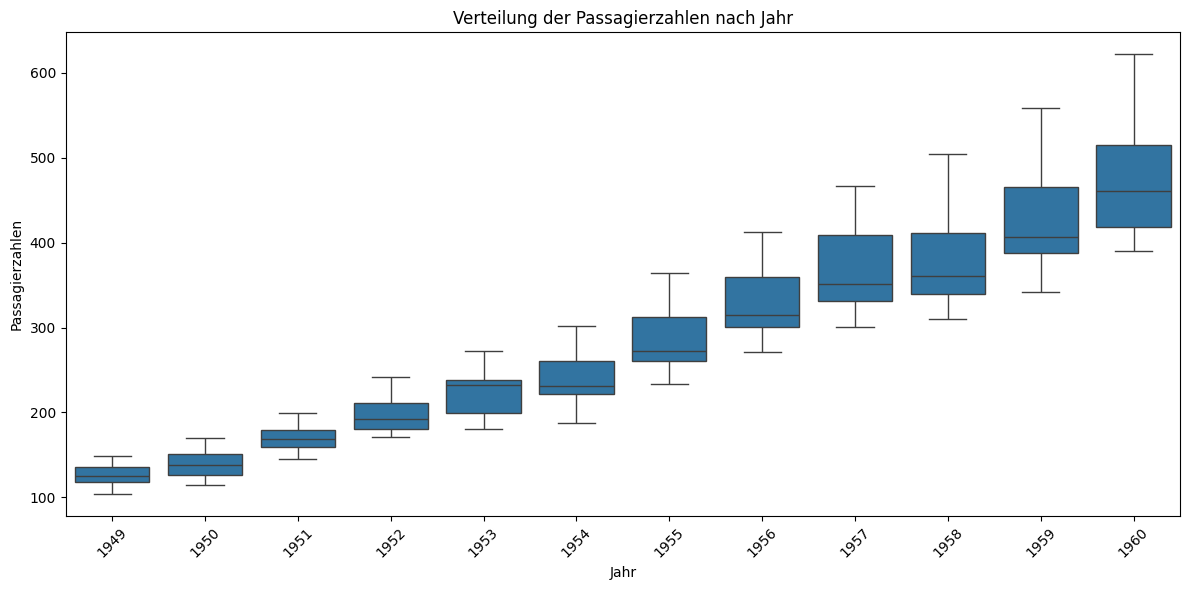

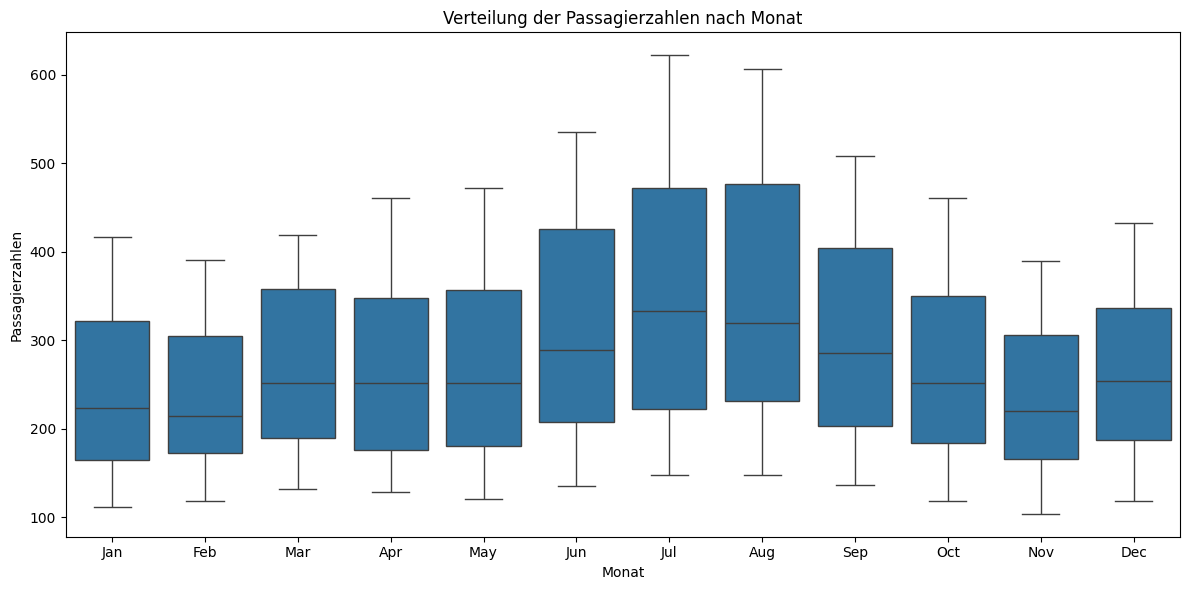

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Laden des Datensatzes
flights = sns.load_dataset('flights')

# Erstellen eines Boxplots für die Passagierzahlen nach Jahr und Monat
plt.figure(figsize=(12, 6))
sns.boxplot(data=flights, x='year', y='passengers')
plt.title('Verteilung der Passagierzahlen nach Jahr')
plt.xlabel('Jahr')
plt.ylabel('Passagierzahlen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=flights, x='month', y='passengers')
plt.title('Verteilung der Passagierzahlen nach Monat')
plt.xlabel('Monat')
plt.ylabel('Passagierzahlen')
plt.tight_layout()
plt.show()


In [23]:
import seaborn as sns
import pandas as pd

# Laden des Datensatzes
flights = sns.load_dataset('flights')

# Sortieren des DataFrame nach Jahr und Monat
flights = flights.sort_values(['year', 'month'])

# Berechnen des prozentualen Wachstums der Passagierzahlen für jedes Jahr und jeden Monat
flights['passengers_growth'] = flights.groupby('year')['passengers'].pct_change()

# Anzeigen des aktualisierten DataFrames mit der neuen Spalte für das Passagierwachstum
display(flights)


,year,month,passengers,passengers_growth
0,1949,Jan,112,NaN
1,1949,Feb,118,0.053571
2,1949,Mar,132,0.118644
3,1949,Apr,129,-0.022727
4,1949,May,121,-0.062016
...,...,...,...,...
139,1960,Aug,606,-0.025723
140,1960,Sep,508,-0.161716
141,1960,Oct,461,-0.092520
142,1960,Nov,390,-0.154013


In [25]:
def ratio_previous_year(x):
    current_year = x['year']
    current_month = x['month']
    previous_year = current_year - 1
    if current_year == 1949:
        return None
    entry_previous_year = flights[(flights['year'] == previous_year) & (flights['month'] == current_month)]
    growth_ratio = x['passengers'] / entry_previous_year['passengers']
    return growth_ratio.item()
 
flights['growth'] = flights.apply(ratio_previous_year, axis=1)

In [26]:
flights

,year,month,passengers,passengers_growth,growth
0,1949,Jan,112,NaN,NaN
1,1949,Feb,118,0.053571,NaN
2,1949,Mar,132,0.118644,NaN
3,1949,Apr,129,-0.022727,NaN
4,1949,May,121,-0.062016,NaN
...,...,...,...,...,...
139,1960,Aug,606,-0.025723,1.084079
140,1960,Sep,508,-0.161716,1.097192
141,1960,Oct,461,-0.092520,1.132678
142,1960,Nov,390,-0.154013,1.077348
